In [0]:
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms

Download/split the dataset

In [3]:
transform = transforms.ToTensor()

#train data
train_data = datasets.MNIST(root='data', transform=transform, download=True, train=True)

#test data
test_data = datasets.MNIST(root='data', transform=transform, download=True, train=False)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


**Create dataloaders**

In [0]:
# create train loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

# create test loader
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

Visualize the data

In [0]:
import matplotlib.pyplot as plt

(28, 28)


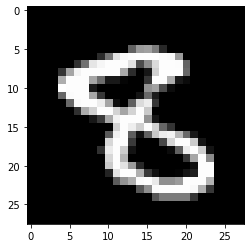

In [23]:
# define a data iteration instance
train_iter = iter(train_loader)

#get one batch from the training data
images, _ = train_iter.next()

img = np.squeeze(np.array(images[0]))
print(img.shape)

plt.imshow(img, cmap='gray')

Define the model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class LinearModel(nn.Module):
  def __init__(self, input_size, bottle_neck_size):
    super(LinearModel, self).__init__()

    # Encoder part
    self.fc1 = nn.Linear(input_size, bottle_neck_size)
    # Decoder part
    self.fc2 = nn.Linear(bottle_neck_size, input_size)

  def forward(self, x):
    #relu activation
    x = F.relu(self.fc1(x))

    # sigmoid activation
    x = torch.sigmoid(self.fc2(x))

    return x

model = LinearModel(28*28, 64)

In [0]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Training Loop

In [28]:
n_epochs = 20

for i in range(n_epochs):
  train_loss = 0.0
  for data in train_loader:
    images, _ = data
    images = images.view(images.shape[0], -1)

    optimizer.zero_grad()

    outputs = model(images)

    loss = criterion(outputs, images)
    loss.backward()

    optimizer.step()

    train_loss += loss.item()

  print('epoch', i, 'loss', train_loss)

epoch 0 loss 30.49223391711712
epoch 1 loss 22.182149787899107
epoch 2 loss 21.900136570911855
epoch 3 loss 21.787702597677708
epoch 4 loss 21.6099727996625
epoch 5 loss 21.459151265677065
epoch 6 loss 21.33393307775259
epoch 7 loss 21.264131490141153
epoch 8 loss 21.104086310137063
epoch 9 loss 21.110663006082177
epoch 10 loss 21.102129659149796
epoch 11 loss 20.8943571485579
epoch 12 loss 20.901489533483982
epoch 13 loss 20.81956586521119
epoch 14 loss 20.82563209766522
epoch 15 loss 20.781023821327835
epoch 16 loss 20.746865225490183
epoch 17 loss 20.696506237611175
epoch 18 loss 20.646054691635072
epoch 19 loss 20.68422097992152


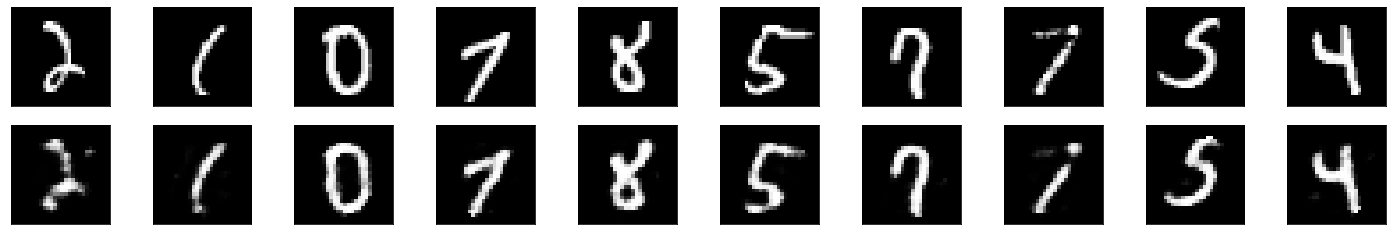

In [30]:
# obtain one batch of test images
batch_size = 32
dataiter = iter(test_loader)
images, labels = dataiter.next()

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)